In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf
from empiricaldist import Cdf
import seaborn as sns
nsfg = pd.read_hdf('nsfg.hdf5','nsfg')
gss = pd.read_hdf('gss.hdf5','gss')


# 1. Probability mass functions
In the previous chapter, we used histograms to visualize distributions. In this chapter, I'll present two more ways to represent distributions and you'll learn when to use each of them. And we'll work with a new dataset.

2. GSS
The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues. It is widely used by politicians, policy makers, and researchers, including me.

3. Read the data
The GSS contains hundreds of variables; I've selected just a few. And I have already cleaned and validated them, so we just have to read the file, like this. If you run gss dot head(), you can see the first few rows.

4. Histogram
To get started with this dataset, let's look at the distribution of educ, which records the number of years of education for each respondent. First I'll select a column from the DataFrame. We've already seen one way to visualize a distribution, a histogram. Here's the code that generates it, and here's the histogram for this variable. Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

5. PMF
An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears. I've provided a class called Pmf that computes a probability mass function. This class is based on a Pandas Series and it provides some methods that aren't in Pandas. The first argument can be any kind of sequence; in this case, it's a Series object. The second argument indicates that we don't want to normalize this PMF. I'll explain what that means soon. The result is a Series that contains the values on the left and the counts on the right. In this dataset, there are 566 respondents who report that they have zero years of formal education.

6. PMF
You can use the bracket operator to look up a value in a Pmf and get a count. This example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.

7. Normalize
Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting normalize=True; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1. Now if we use the bracket operator, the result is a fraction. In this example, the fraction of people with 12 years of education is 0.3086, a little more than 30%.

8. Plot
The Pmf class provides a bar() method that plots a PMF as a bar chart. And here's what it looks like. In this figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to two and four years of college.

9. Histogram vs. PMF
For this data, the PMF is probably a better choice than the histogram. The PMF shows all unique values, so we can see exactly where the peaks are. Because the histogram puts values into bins, it obscures some details. In this example, we can't see the peaks at 14 and 16 years.

10. Let's make some PMFs!
PMFs have limitations, too, as we'll see in the next lesson. But first, let's get some practice with PMFs.

# Make a PMF
The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.


Make a PMF for year with normalize=False and display the result.

In [2]:
# Compute the PMF for year
years = gss['year']
pmf_year = Pmf.from_seq(years, normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


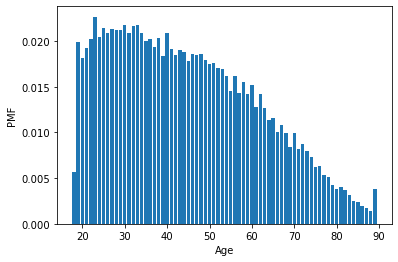

In [3]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# 1. Cumulative distribution functions
In the previous lesson, we saw the probability mass function, or PMF, which represents the possible values in a distribution and their probabilities. In this lesson, we'll see another way to represent a distribution, the cumulative distribution function, or CDF. CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

2. From PMF to CDF
You might remember that a PMF tells you - if you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

3. Example
As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, and 5. The PMF says that the probability of value 1 is 1/5; the probability of value 2 is 2/5, and the probabilities for 3 and 5 are 1/5. The CDF is the cumulative sum of the probabilities from the PMF. For example, the CDF of 2 is three fifths, because three out of 5 values in the distribution are less than or equal to 2. The CDF of 5 is 1, or 100%, because all of the values in the distribution are less than or equal to 5.

4. Make and plot a CDF
In the code for this course, I provide a Cdf class which is similar to the Pmf class we've seen. As a function, Cdf takes any kind of sequence and returns a new Cdf object. In this example, the sequence is the ages of respondents in the General Social Survey. The Cdf provides plot, which plots the CDF as a line. Here's what it looks like. The x-axis is the ages, from 18 to 89. The y-axis is the cumulative probabilities, from 0 to 1.

5. Evaluating the CDF
The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger. The arrow in the figure shows how you could read this value from the CDF, at least approximately.

6. Evaluating the inverse CDF
The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. In this example, I look up the probability 0.25, which returns 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution". I also look up probability 0.75, which returns 57, so 75% of the respondents are 57 or younger. Again, the arrows in the figure show how you could read these values from the CDF. By the way, the distance from the 25th to the 75th percentile is called the interquartile range, or IQR. It measures the spread of the distribution, so it is similar to standard deviation or variance. Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does. So IQR can be more "robust" than variance, which means it works well even if there are errors in the data or extreme values.

7. Let's practice!
In the next lesson, we'll use CDFs to compare distributions between groups. But first, you can practice making and plotting CDFs, and reading them forward and backward.

In [4]:
# Select the age column
age = gss['age']
# Compute the CDF of age
cdf_age = Cdf.from_seq(age)
print(cdf_age.head(10))

# Calculate the CDF of 30
print(cdf_age[30])
print(pmf_age[30])

18.0    0.005620
19.0    0.025497
20.0    0.043609
21.0    0.062828
22.0    0.083075
23.0    0.105747
24.0    0.126154
25.0    0.147589
26.0    0.168462
27.0    0.189769
Name: , dtype: float64
0.2539137136526389
0.021724121321109166


In [5]:
q=51
p = Cdf.from_seq(q)
print(p)

51    1.0
Name: , dtype: float64


In [6]:
cdf = Cdf.from_seq(gss['age'])
gss['age']


0        26.0
1        38.0
2        57.0
3        61.0
4        59.0
         ... 
62461    32.0
62462    61.0
62463    67.0
62464    57.0
62465    56.0
Name: age, Length: 62466, dtype: float64

234.000000       0.000414
236.500000       0.000955
245.000000       0.001333
259.000000       0.001928
267.750000       0.002198
                   ...   
143778.000000    0.989297
144502.717140    0.993567
146153.668585    0.996180
155139.973100    0.999387
162607.000000    1.000000
Name: , Length: 597, dtype: float64


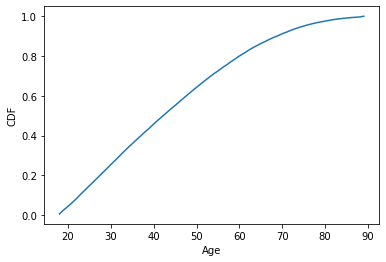

In [7]:
cdf_income = Cdf.from_seq(gss['realinc'])
print(cdf_income)
cdf.plot()
# Label the axes
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [8]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


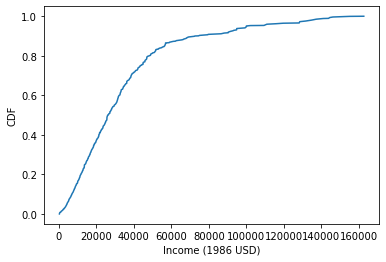

In [9]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

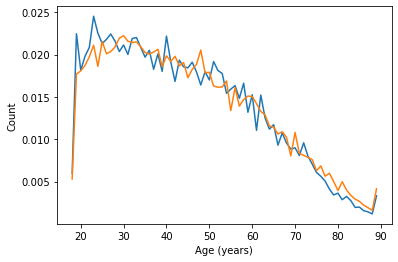

In [10]:
male = gss['sex'] ==1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf.from_seq(male_age).plot(label = 'male')
Pmf.from_seq(female_age).plot(label = 'female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

# 1. Comparing distributions
So far we've seen two ways to represent distributions, PMFs and CDFs. In this lesson, we'll use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each.

2. Multiple PMFs
One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents. First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each. Of course I always remember to label the axes!

3. Age PMFs
Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

4. Multiple CDFs
We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

5. Age CDFs
And here is the result. In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

6. Income distribution
As another example, let's look at household income and compare the distribution before and after 1995 (I chose 1995 because it's roughly the midpoint of the survey). The variable realinc represents household income in 1986 dollars. I'll make a boolean Series to select respondents interviewed before 1995. Now I can plot the PMFs. And label the axes.

7. Income PMFs
Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

8. Income CDFs
Here's the code to generate the CDFs.

9. Income CDFs
And here are the results. Below $30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

10. Let's practice!
In general, I recommend CDFs for exploratory analysis. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two. In the exercises for this lesson, you'll have a chance to compare incomes for respondents with different education levels.

In [11]:
cdf = Cdf.from_seq(gss['educ'])
cdf(12)

array(0.53226117)

# Extract education levels
Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

Instructions
0 XP
Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
Complete the line that identifies respondents with 12 or fewer years of education.
Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [12]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


## Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')
### You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.

Instructions
100 XP
Fill in the missing lines of code to plot the CDFs.

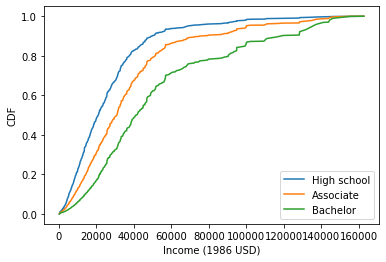

In [13]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [14]:
help(Cdf)

Help on class Cdf in module empiricaldist.empiricaldist:

class Cdf(Distribution)
 |  Cdf(*args, **kwargs)
 |  
 |  Represents a Cumulative Distribution Function (CDF).
 |  
 |  Method resolution order:
 |      Cdf
 |      Distribution
 |      pandas.core.series.Series
 |      pandas.core.base.IndexOpsMixin
 |      pandas.core.arraylike.OpsMixin
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      pandas.core.indexing.IndexingMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  copy(self, deep=True)
 |      Make a copy.
 |      
 |      :return: new Cdf
 |  
 |  make_hazard(self, **kwargs)
 |      Make a Hazard from the Cdf.
 |      
 |      :return: Hazard
 |  
 |  make_pmf(self, **kwargs)
 |      Make a Pmf from the Cdf.
 |      
 |      :param normalize: Boolean, whether to normalize the Pmf
 |      
 |      :return: Pmf
 |  
 |  make_same(self, dist)
 |  

# Got It!
1. Modeling distributions
In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

2. The normal distribution
Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

3. The normal CDF
SciPy provides an object called norm that represents the normal distribution. I'll use np dot linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. Dot cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

4. Comparing CDFs
Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

5. The bell curve
The norm object also provides dot pdf(), which evaluates the probability density function, or PDF. And here's what that looks like. It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

6. Sample PMF
Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

7. KDE plot
To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as sns. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

8. KDE and PDF
Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

9. PMF, CDF, KDE
To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use a PMF for distributions with a small number of unique values and KDE if there are a lot of values.

10. Let's practice!
Now let's practice what we learned in this lesson.

<AxesSubplot:>

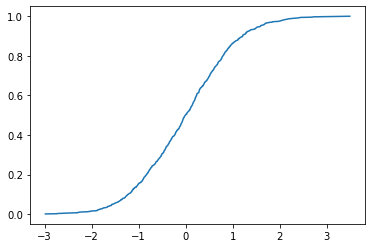

In [15]:
sample = np.random.normal(size=1000)
Cdf.from_seq(sample).plot()

Modeling distributions
In the previous lesson we used PMFs and CDFs to plot and compare distributions. We saw that PMFs don't work very well when the data have a large number of unique values. In this lesson you'll learn about probability density functions, or PDFs, and learn how to estimate PDFs from data.

2. The normal distribution
Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF. This sigmoid shape is what we expect to see with values from a normal distribution.

3. The normal CDF
SciPy provides an object called norm that represents the normal distribution. I'll use np dot linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. Dot cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

4. Comparing CDFs
Here's the result. The CDF from the sample is pretty close to the normal CDF over the whole range. If this were real data, we would conclude that the normal distribution is a good model for the data.

5. The bell curve
The norm object also provides dot pdf(), which evaluates the probability density function, or PDF. And here's what that looks like. It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

6. Sample PMF
Here's what it looks like. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

7. KDE plot
To generate a KDE plot, we'll use the Seaborn library for data visualization, which I import as sns. Seaborn provides kdeplot, which takes the sample, estimates the PDF, and plots it. Here's what it looks like.

8. KDE and PDF
Now we can compare the KDE plot and the normal PDF. Here's the code. There's nothing there we haven't already seen. And here's the result. The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

9. PMF, CDF, KDE
To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE. In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use a PMF for distributions with a small number of unique values and KDE if there are a lot of values.

10. Let's practice!
Now let's practice what we learned in this lesson.

Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

Instructions
100 XP
Extract 'realinc' from gss and compute its logarithm using np.log10().
Compute the mean and standard deviation of the result.
Make a norm object by passing the computed mean and standard deviation to norm().

In [16]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(log_income)

4.371148677933652 0.4290043733010077


 Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

 Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

 Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

 Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

Instructions
70 XP
Evaluate the normal cumulative distribution function using dist.cdf.
Use the Cdf() function to compute the CDF of log_income.
Plot the result.

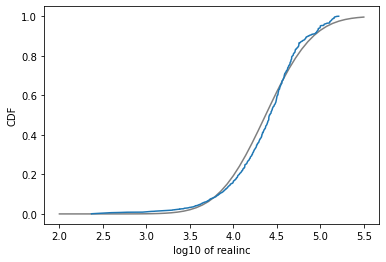

In [20]:
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)







# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

# Comparing PDFs
In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

from scipy.stats import norm
dist = norm(mean, std)
Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. To learn more about this function and Seaborn, you can check out DataCamp's Data Visualization with Seaborn course. Here, Seaborn has been imported for you as sns.

Instructions
100 XP
Evaluate the normal PDF using dist, which is a norm object with the same mean and standard deviation as the data.
Make a KDE plot of the logarithms of the incomes, using log_income, which is a Series object.

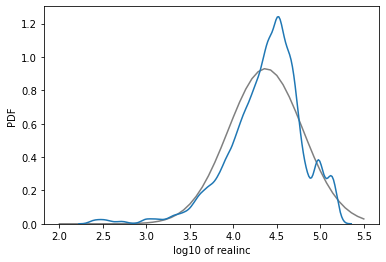

In [18]:
from scipy.stats import norm
dist = norm(mean, std)

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income).plot

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# Congratulations on completing Chapter 2! We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. In the next Chapter we'll explore relationships between variables, starting with heights and weights from a large survey of adults in the U.S. See you there!